# Film Flix Database Statistics

In [131]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

My Jupyter notebook client app:
- imports pandas and matplotlib
- connects to my microservice
- reads the data from the Film Flix database
- and takes the retrieved json and creates a pandas dataframe

It uses the dataframe to display the first 3 lines of the database and visualise some basic statistics.

In [132]:
url = "https://filmflixrestapi.onrender.com/api/films"
df = pd.read_json(url) 
print(df.head(3))
# print(df.tail())

   duration   genre  id rating                 title  year_released
0       116  Comedy   1     PG           The Muppets           2022
1       109    Test   2     PG  The Legend of Tarzan           2016
2       123  Action   3     PG          Jason Bourne           2016


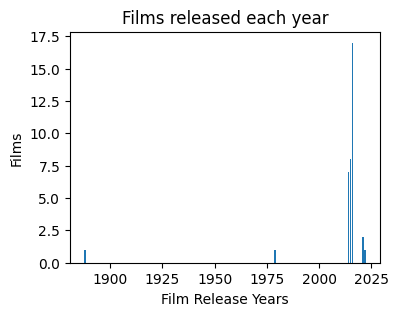

In [133]:
values, counts = np.unique(df['year_released'], return_counts=True)

plt.figure(figsize=(4,3))
plt.bar(values, counts)

plt.xlabel("Film Release Years")
plt.ylabel("Films")
plt.title("Films released each year")
plt.show()

Most of the films are modern, released between 2010 and 2020.

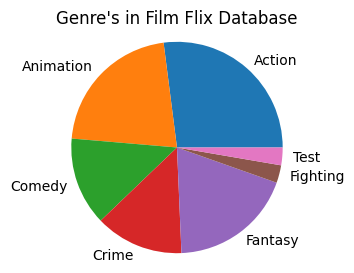

In [134]:
values, counts = np.unique(df['genre'], return_counts=True)

plt.figure(figsize=(3,3))
plt.pie(counts, labels=values)
plt.axis('equal')

plt.title("Genre's in Film Flix Database")
plt.show()

There are no SciFi movies available!

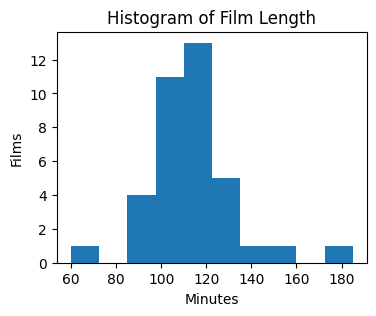

In [135]:
plt.figure(figsize=(4,3))
plt.hist(df['duration'], bins=10)

plt.title("Histogram of Film Length")
plt.xlabel("Minutes")
plt.ylabel("Films")
plt.show()

Most movies are around 2hrs long.

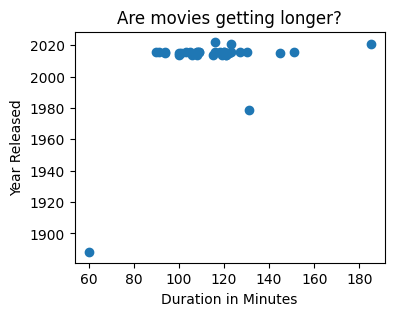

In [136]:
plt.figure(figsize=(4,3))
plt.scatter(df['duration'], df['year_released'])

plt.title("Are movies getting longer?")
plt.xlabel("Duration in Minutes")
plt.ylabel("Year Released")
plt.show()

? a really long movie at 185 mins

? a really old movie

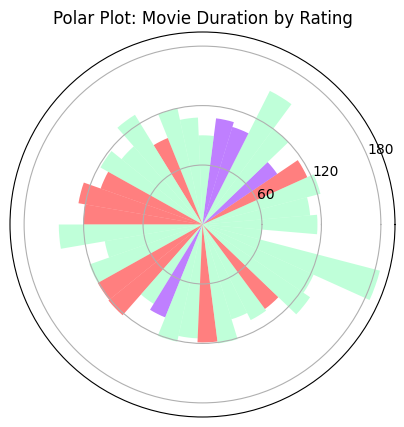

In [137]:
# Finding the Ratings Categories
df['rating_labels'] = df['rating'].astype('category').cat.codes
# Using dataframe length to determine num and size of pie slices
N = len(df)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

radii = df['duration'] # bar height based on movie duration
width = (2 * np.pi) / N # ensure no overlap

# Determine colours for pie slices
unique_categories = df['rating_labels'].nunique()
colors = plt.cm.rainbow(np.linspace(0, 1, unique_categories))[df['rating_labels']]

# Build the plot
fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': 'polar'})
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)
ax.grid(True)
ax.set_xticks([])
ax.set_yticks([60, 120, 180])
ax.set_title("Polar Plot: Movie Duration by Rating")

plt.show()

Polar Plot showing some quite long kids movies!

Matrix Resurections is a PG in the DB, it was a 15 in the UK.

https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html

Radial ticks in polar plots are controlled using the same methods as y-axis ticks for Cartesian plots because, in polar plots, the radial dimension corresponds to the y-axis of a Cartesian plot.

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_yticks.html#matplotlib.axes.Axes.set_yticks